In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
import os

In [4]:
results = []

for optimizer in optimizers:
    csv_files = sorted(['csv_files/' + x for x in os.listdir('csv_files/') if optimizer[:2] == x[:2]])
    
    optimizer_results = {}
    for filename in csv_files:
        dimension = int(filename.split("_")[2][:-4])

        df = pd.read_csv(filename, index_col=0)
        df['Dimension'] = dimension
        df['Optimizer'] = optimizer
        
        results.append(df)
        
results = pd.concat(results)
results.index = range(len(results))

In [5]:
results = results[results['Dimension'] <= 50].copy()
results.head(2)

,Iterations,Time (sec),Distance,Dimension,Optimizer
0,372.0,0.062933,0.00001,10,cs
1,393.0,0.069881,0.00001,10,cs


In [11]:
results["Optimizer"] = results["Optimizer"].apply(lambda x: x.upper())

In [12]:
optimizers = ['CS', 'EGD', 'PFW']
colors = ['blue', 'red', 'green']

In [13]:
bar_length = 0.5

In [14]:
mean_values = results.groupby(['Optimizer', 'Dimension']).mean()
min_values = results.groupby(['Optimizer', 'Dimension']).min()
max_values = results.groupby(['Optimizer', 'Dimension']).max()
std_values = results.groupby(['Optimizer', 'Dimension']).std()

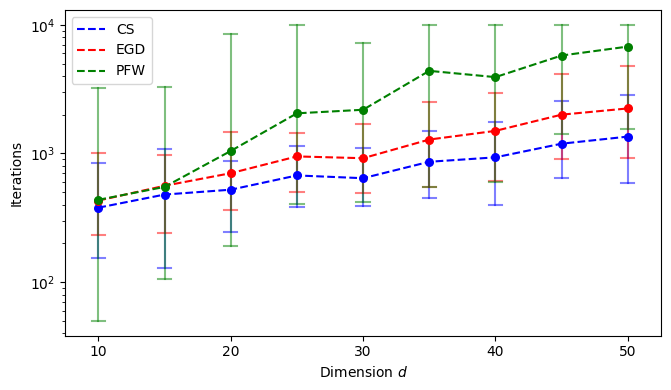

In [15]:
col = 'Iterations'

plt.figure(figsize=(7, 4))
for color, optimizer in zip(colors, optimizers):
    plt.plot(mean_values.loc[optimizer][col], '--', 
             label=optimizer, color=color, zorder=3)
    plt.scatter(mean_values.loc[optimizer].index, mean_values.loc[optimizer][col], 
                s=30, color=color, zorder=3)

    for i in std_values.loc[optimizer].index:
        mean = mean_values.loc[optimizer].loc[i, col]
        std = std_values.loc[optimizer].loc[i, col]
        min_ = min_values.loc[optimizer].loc[i, col]
        max_ = max_values.loc[optimizer].loc[i, col]
        
        plt.plot([i, i], [min_, max_], alpha=0.5, color=color)

        plt.plot([i - bar_length, i + bar_length], [min_, min_], 
                 alpha=0.5, color=color, zorder=1)
        plt.plot([i - bar_length, i + bar_length], [max_, max_], 
                 alpha=0.5, color=color, zorder=1)

plt.xlabel("Dimension $d$", size=10)
plt.ylabel(col, size=10)

plt.tight_layout()

plt.legend()
plt.yscale('log')
plt.savefig("iterations.png", dpi=150)

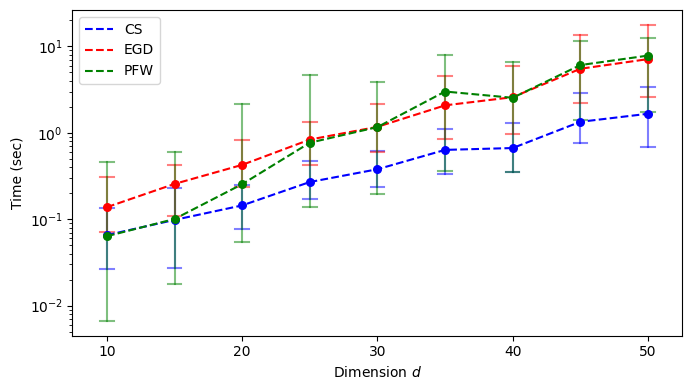

In [16]:
col = 'Time (sec)'

plt.figure(figsize=(7, 4))
for color, optimizer in zip(colors, optimizers):
    plt.plot(mean_values.loc[optimizer][col], '--', 
             label=optimizer, color=color, zorder=3)
    plt.scatter(mean_values.loc[optimizer].index, mean_values.loc[optimizer][col], 
                s=30, color=color, zorder=3)

    for i in std_values.loc[optimizer].index:
        mean = mean_values.loc[optimizer].loc[i, col]
        std = std_values.loc[optimizer].loc[i, col]
        min_ = min_values.loc[optimizer].loc[i, col]
        max_ = max_values.loc[optimizer].loc[i, col]
        
        plt.plot([i, i], [min_, max_], alpha=0.5, color=color)

        plt.plot([i - bar_length, i + bar_length], [min_, min_], 
                 alpha=0.5, color=color, zorder=1)
        plt.plot([i - bar_length, i + bar_length], [max_, max_], 
                 alpha=0.5, color=color, zorder=1)

plt.xlabel("Dimension $d$", size=10)
plt.ylabel(col, size=10)

plt.tight_layout()

plt.legend()
plt.yscale('log')
plt.savefig("time.png", dpi=150)